In [8]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from scipy.interpolate import interp1d
from scipy.io.idl import readsav
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
from scipy.optimize import leastsq
import astropy.constants as const
from astropy.convolution import convolve, Box1DKernel


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

Rather than try to ID all lines, instead fit all lines in Linsky paper, and get upper limits for Peacock+ lines.

In [2]:
line_tab = Table.read('linsky_lines.tsv', format ='ascii')
line_tab

Wavelength,Ion,Formation,α Cen A (G2 V),ϵ Eri (K2 V),AU Mic (dM1e),mult,t_uncert
float64,str8,float64,float64,float64,float64,str4,str4
30.392,Heii,4.9,4.7,33.0,340.0,--,TRUE
58.4334,Hei,4.65,--,--,--,--,TRUE
97.702,Ciii,4.72,5.2,13.5,79.6,--,--
102.572,Hi (Lyβ),4.5,--,--,--,--,TRUE
103.193,Ovi,5.43,2.21,14.5,109.0,--,--
103.634,Cii,4.3,0.188,0.502,3.64,--,--
103.702,Cii,4.3,0.283,1.04,6.76,--,--
103.762,Ovi,5.43,1.06,7.67,55.1,--,--
117.6,Ciii,4.72,2.48,10.9,66.0,TRUE,--


In [10]:
lines = line_tab['Wavelength']*10
len(lines[lines > 1100])

29

In [4]:
t1data = Table.read('../combined/trappist-1_sed_var_res_v04.ecsv')


In [5]:
w, f , e = t1data['WAVELENGTH'], t1data['FLUX'], t1data['ERROR']

In [6]:
cos_cut = (w > 1100) & (w < 3100)
w, f, e = w[cos_cut], f[cos_cut], e[cos_cut]

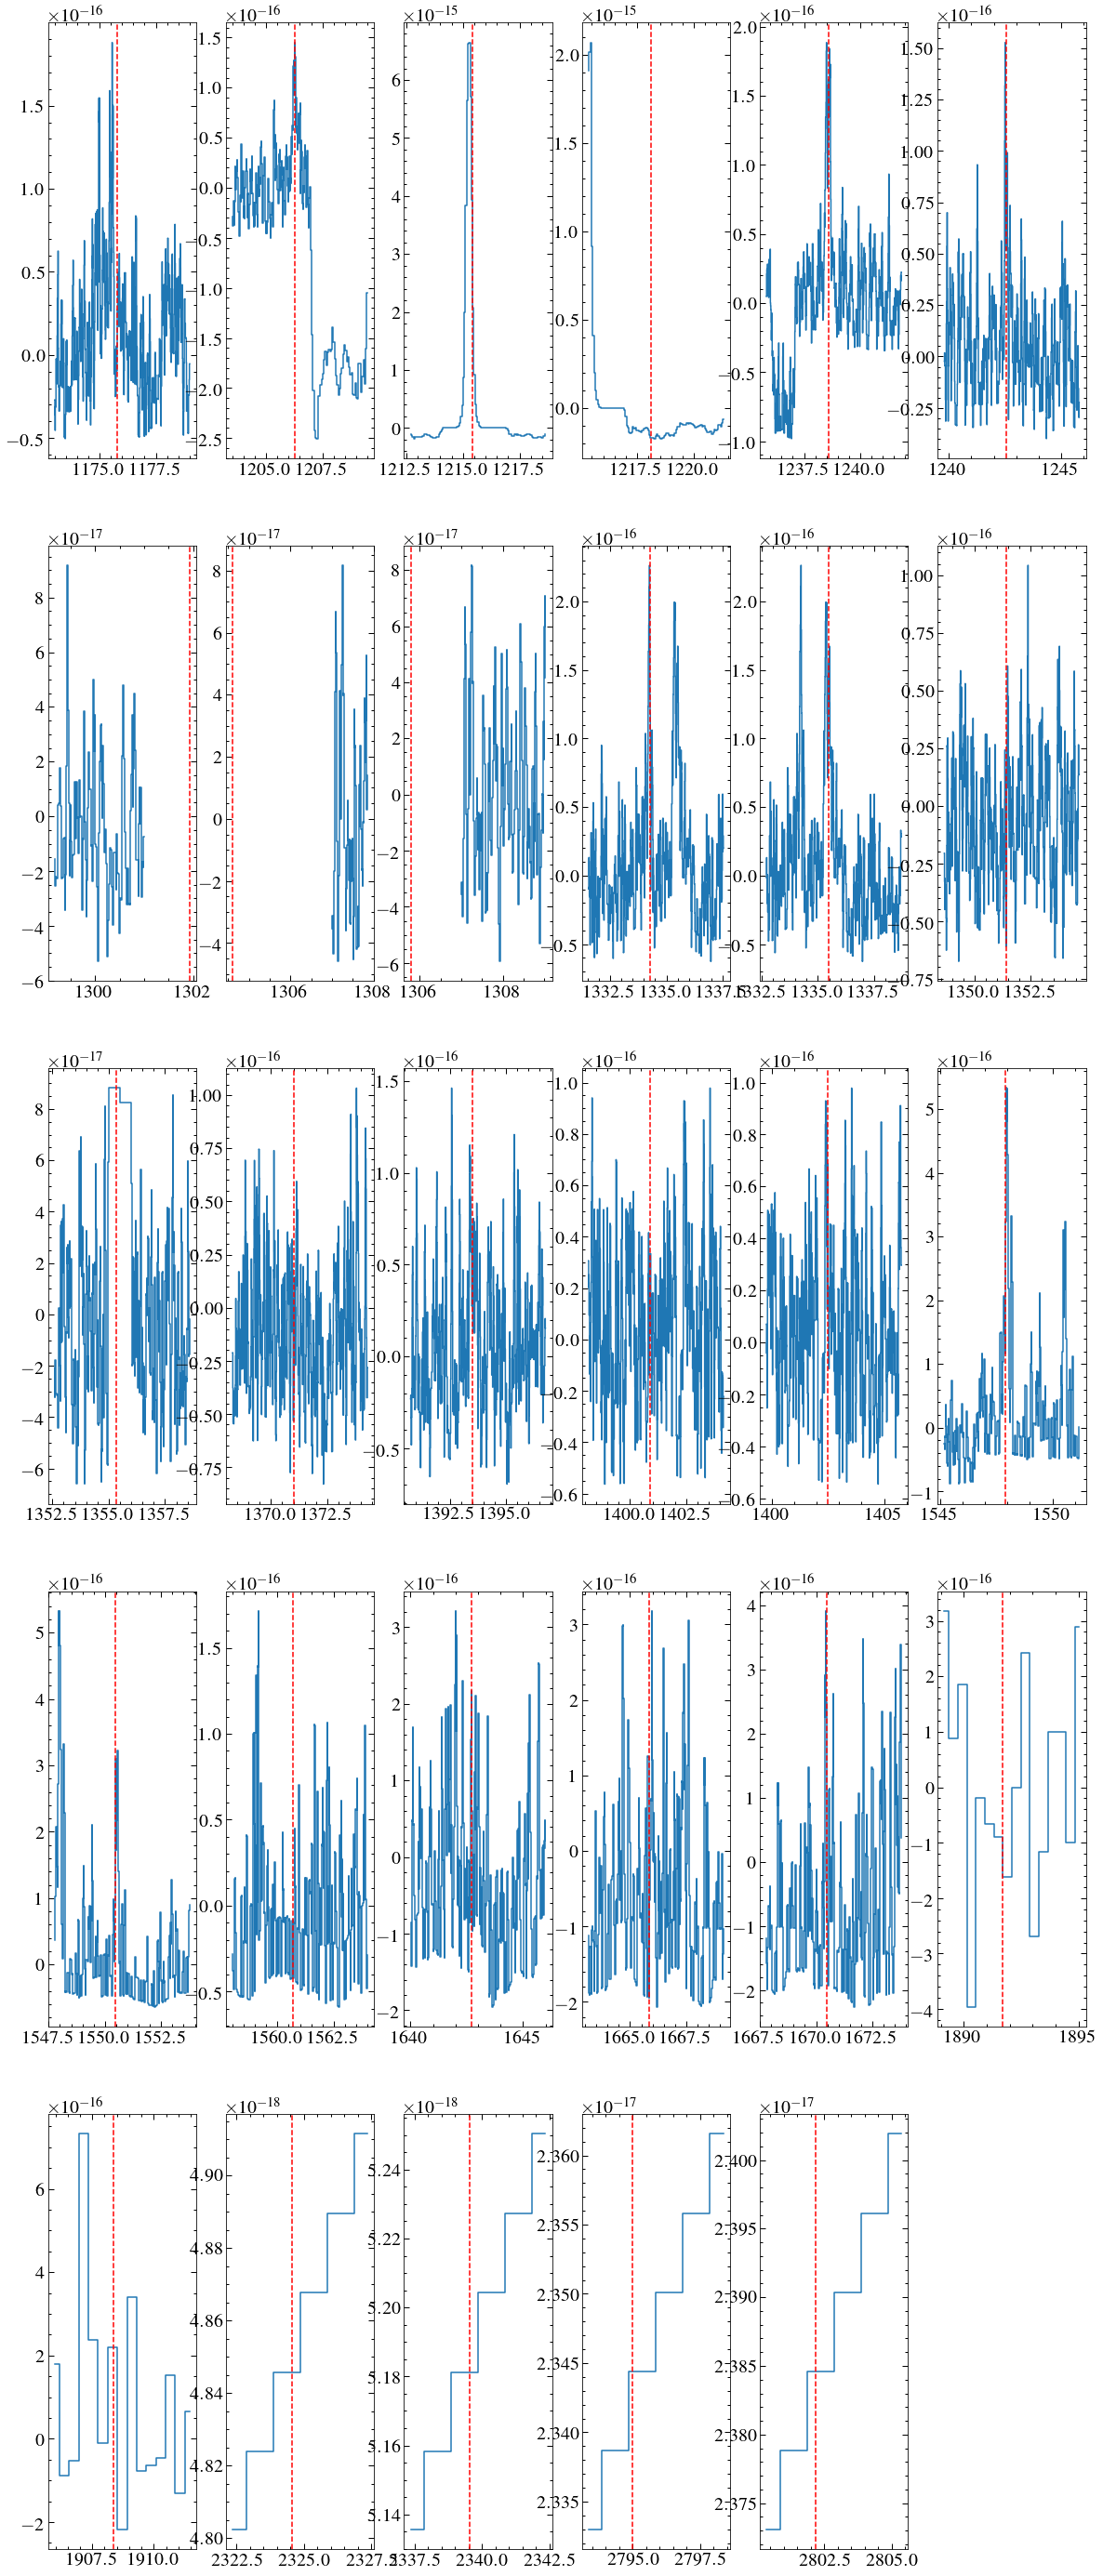

In [14]:
smooth = 5
dv = -56.3*u.km/u.s
plt.figure(figsize=(20, 50))
for i, line in enumerate(lines[lines > 1100]):
    line_mask = (w > line-3) & (w < line+3)
    w1, f1, e1 = w[line_mask], f[line_mask], e[line_mask]
    if line < 1750:
        f1 = convolve(f1,Box1DKernel(smooth))
        e1 = convolve(e1,Box1DKernel(smooth))/smooth**0.5
    #plt.figure(figsize=(5,5))
    plt.subplot(5, 6, i+1)
    plt.step(w1, f1, where='mid')
    dv_line = dv.to(u.AA, equivalencies=u.doppler_optical(line*u.AA))
    plt.axvline(dv_line.value, c='r', ls='--')
    #plt.show()